In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(".../src")

In [ ]:

from src.kernels import sample_hold_kernel, nearest_neighbour_kernel, linear_kernel
from src.interpolation import conv_interpolate

import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from numpy.typing import NDArray


In [43]:
def simple_sin(x):
    return np.sin(x)

def inverterd_sin(x):
    return np.sin(x**(-1))

def singum(x):
    return np.sign(np.sin(8*x))

In [44]:
n_samples = 100
n2_predictions = 200
n4_predictions = 400
n10_predictions = 1010

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin=simple_sin(x)
y_inverted_sin=inverterd_sin(x)
y_signum=singum(x)


0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 2*n predictions: 0.0007
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0600
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.3000


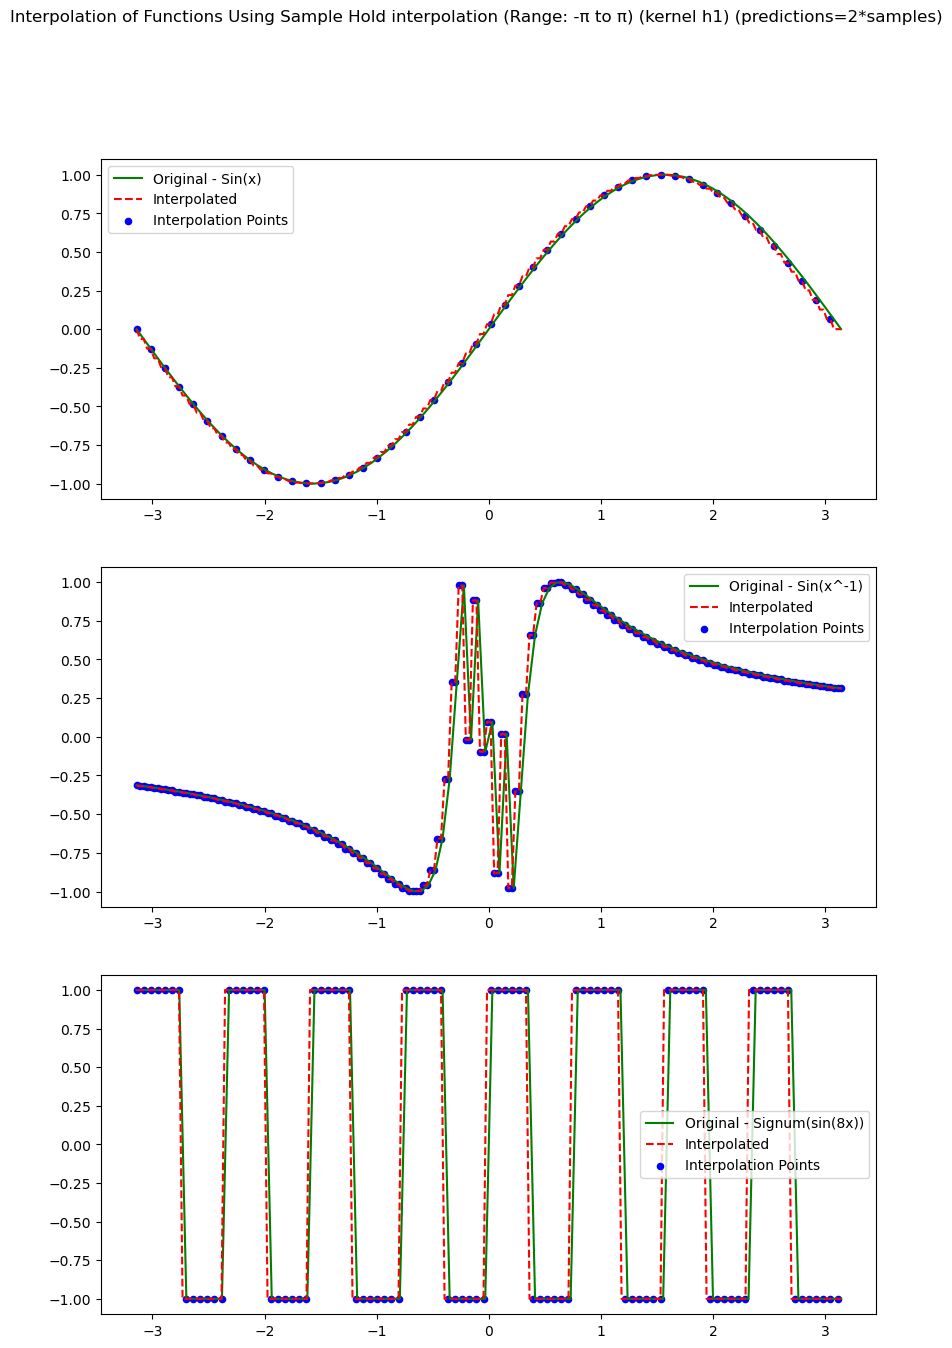

In [45]:
x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n2_interp,sample_hold_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n2_interp,sample_hold_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n2_interp,sample_hold_kernel)

y_simple_sin_true=simple_sin(x_n2_interp)
y_inverted_sin_true=inverterd_sin(x_n2_interp)
y_signum_true=singum(x_n2_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample Hold interpolation (Range: -π to π) (kernel h1) (predictions=2*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n2_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n2_interp[::4], y_simple_sin_interp[::4], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n2_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n2_interp[::1], y_inverted_sin_interp[::1] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n2_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n2_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 2*n predictions: 0.0007
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0669
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.3000


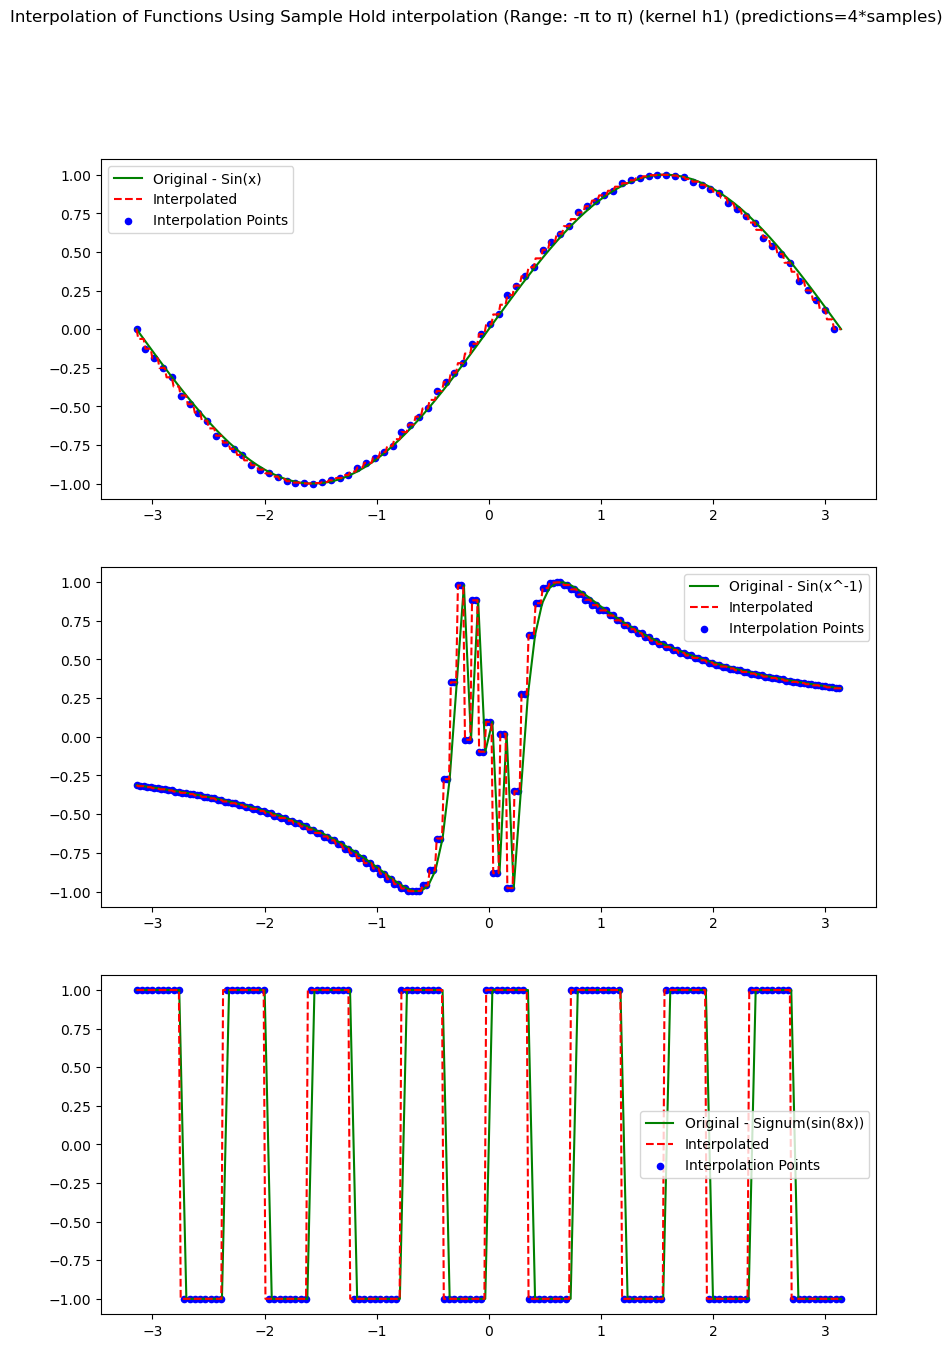

In [46]:
x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n4_interp,sample_hold_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n4_interp,sample_hold_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n4_interp,sample_hold_kernel)

y_simple_sin_true=simple_sin(x_n4_interp)
y_inverted_sin_true=inverterd_sin(x_n4_interp)
y_signum_true=singum(x_n4_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample Hold interpolation (Range: -π to π) (kernel h1) (predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n4_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n4_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n4_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n4_interp[::2], y_inverted_sin_interp[::2] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n4_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n4_interp[::3], y_signum_interp[::3], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 2*n predictions: 0.0007
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0610
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.2970


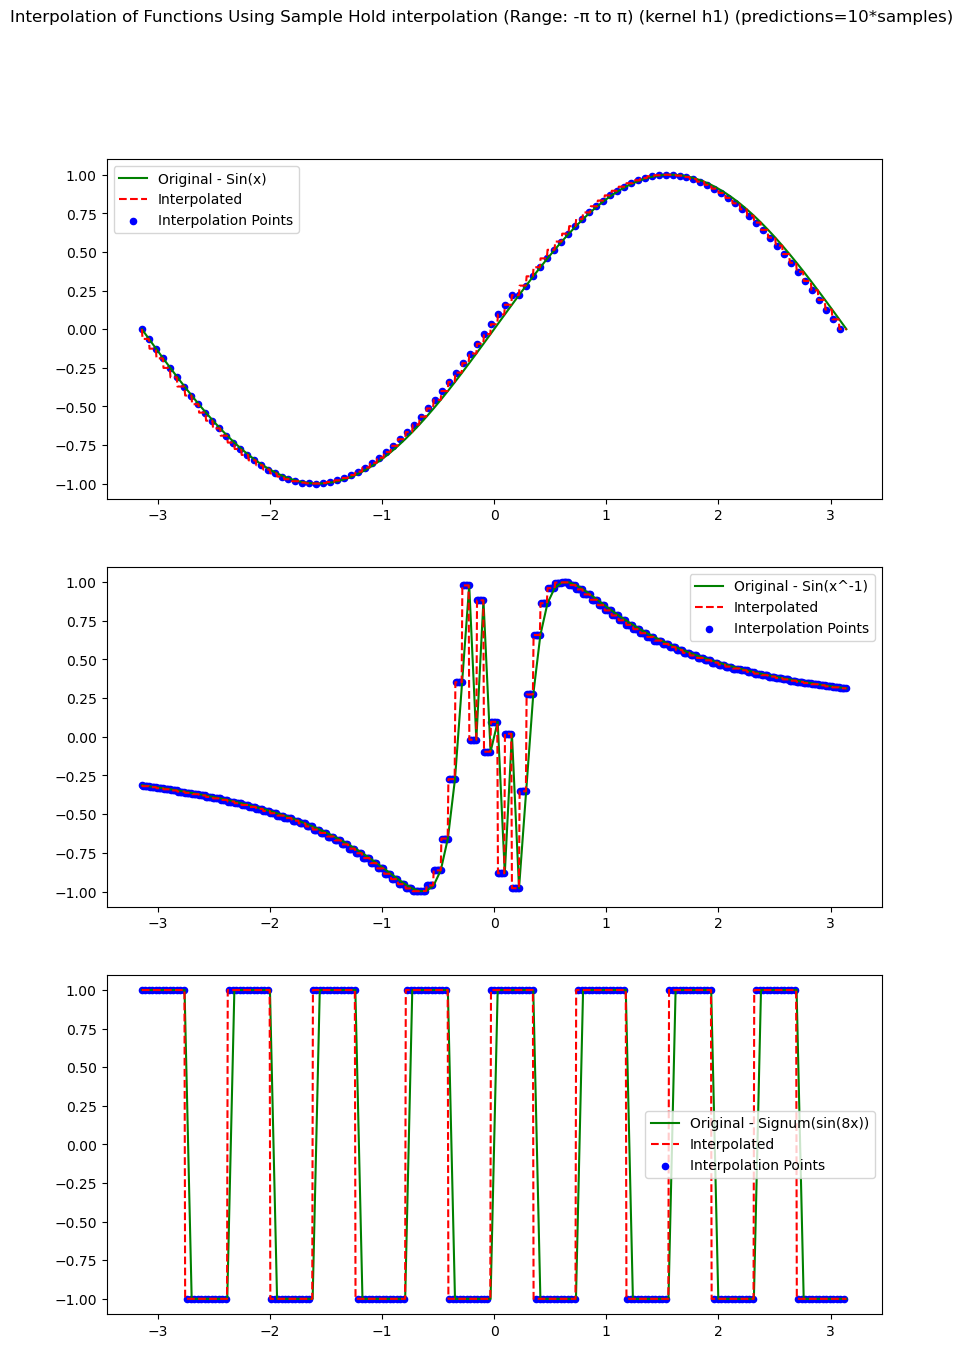

In [47]:
x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n10_interp,sample_hold_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n10_interp,sample_hold_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n10_interp,sample_hold_kernel)

y_simple_sin_true=simple_sin(x_n10_interp)
y_inverted_sin_true=inverterd_sin(x_n10_interp)
y_signum_true=singum(x_n10_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample Hold interpolation (Range: -π to π) (kernel h1) (predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n10_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n10_interp[::10], y_simple_sin_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n10_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n10_interp[::2], y_inverted_sin_interp[::2] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n10_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n10_interp[::5], y_signum_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 2*n predictions: 0.0002
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0397
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.1600


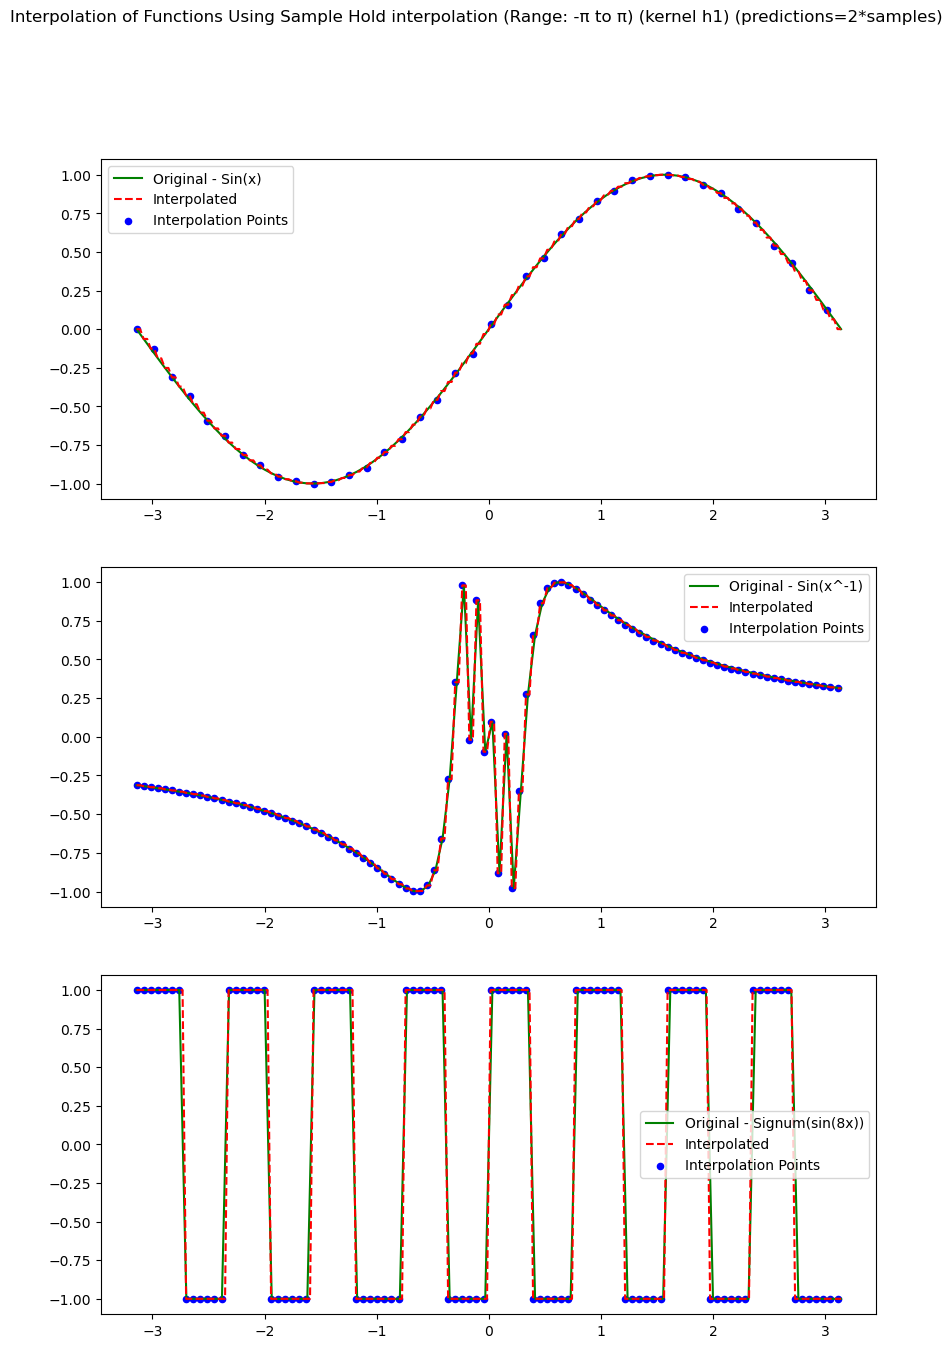

In [48]:
x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n2_interp,nearest_neighbour_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n2_interp,nearest_neighbour_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n2_interp,nearest_neighbour_kernel)

y_simple_sin_true=simple_sin(x_n2_interp)
y_inverted_sin_true=inverterd_sin(x_n2_interp)
y_signum_true=singum(x_n2_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample Hold interpolation (Range: -π to π) (kernel h1) (predictions=2*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n2_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n2_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n2_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n2_interp[::2], y_inverted_sin_interp[::2] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n2_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n2_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 4*n predictions: 0.0002
MSE for Fucntion Sin(x^-1) 4*n predictions: 0.0556
MSE for Fucntion Sign(Sin(8x)) 4*n predictions: 0.1800


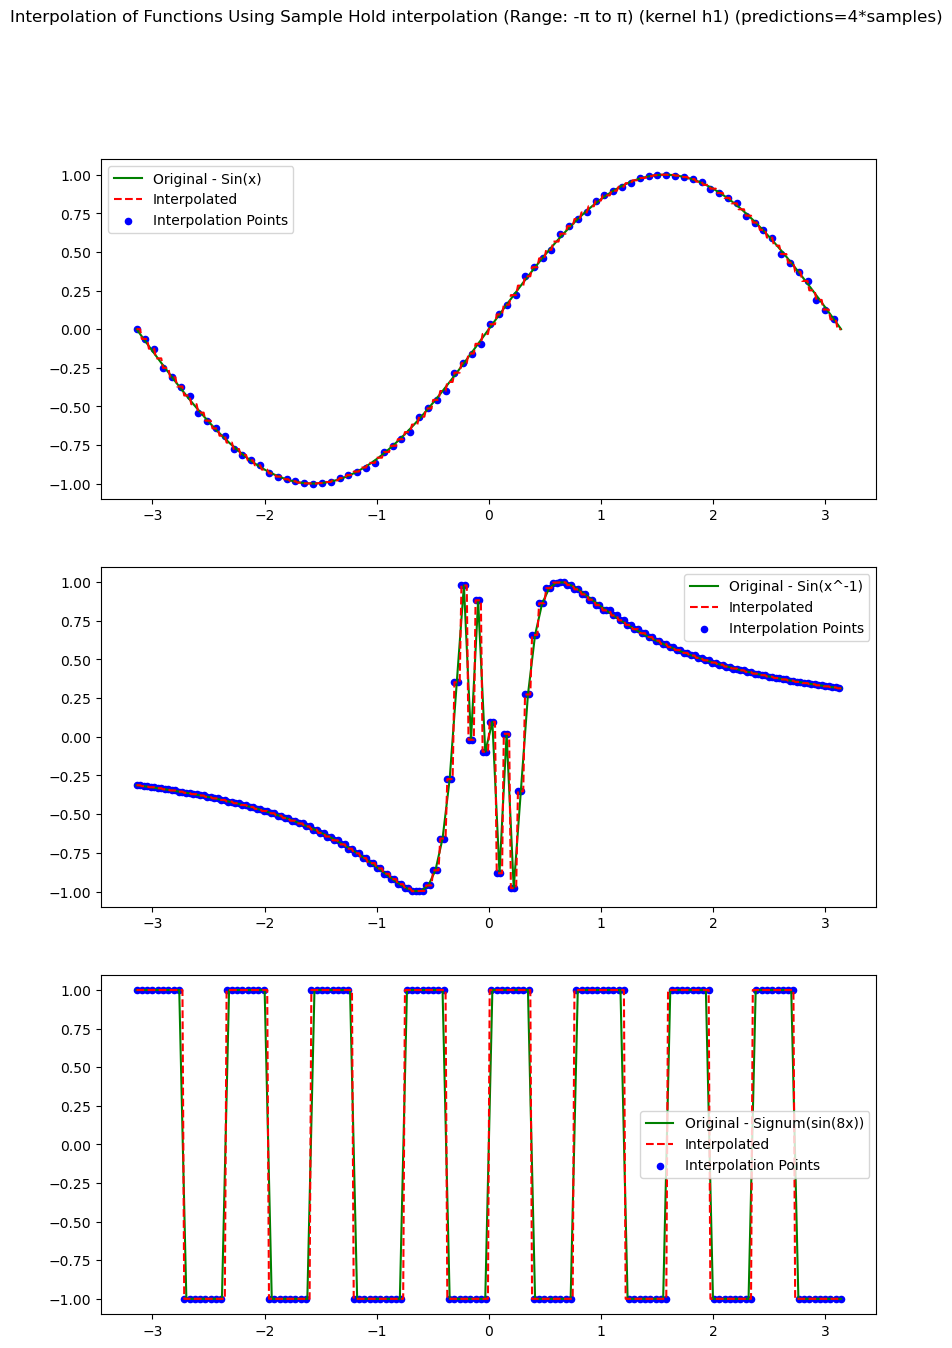

In [49]:

x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n4_interp,nearest_neighbour_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n4_interp, nearest_neighbour_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n4_interp, nearest_neighbour_kernel)

y_simple_sin_true=simple_sin(x_n4_interp)
y_inverted_sin_true=inverterd_sin(x_n4_interp)
y_signum_true=singum(x_n4_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample Hold interpolation (Range: -π to π) (kernel h1) (predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n4_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n4_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n4_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n4_interp[::2], y_inverted_sin_interp[::2] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n4_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n4_interp[::3], y_signum_interp[::3], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 4*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 4*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 4*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 10*n predictions: 0.0002
MSE for Fucntion Sin(x^-1) 10*n predictions: 0.0486
MSE for Fucntion Sign(Sin(8x)) 10*n predictions: 0.1505


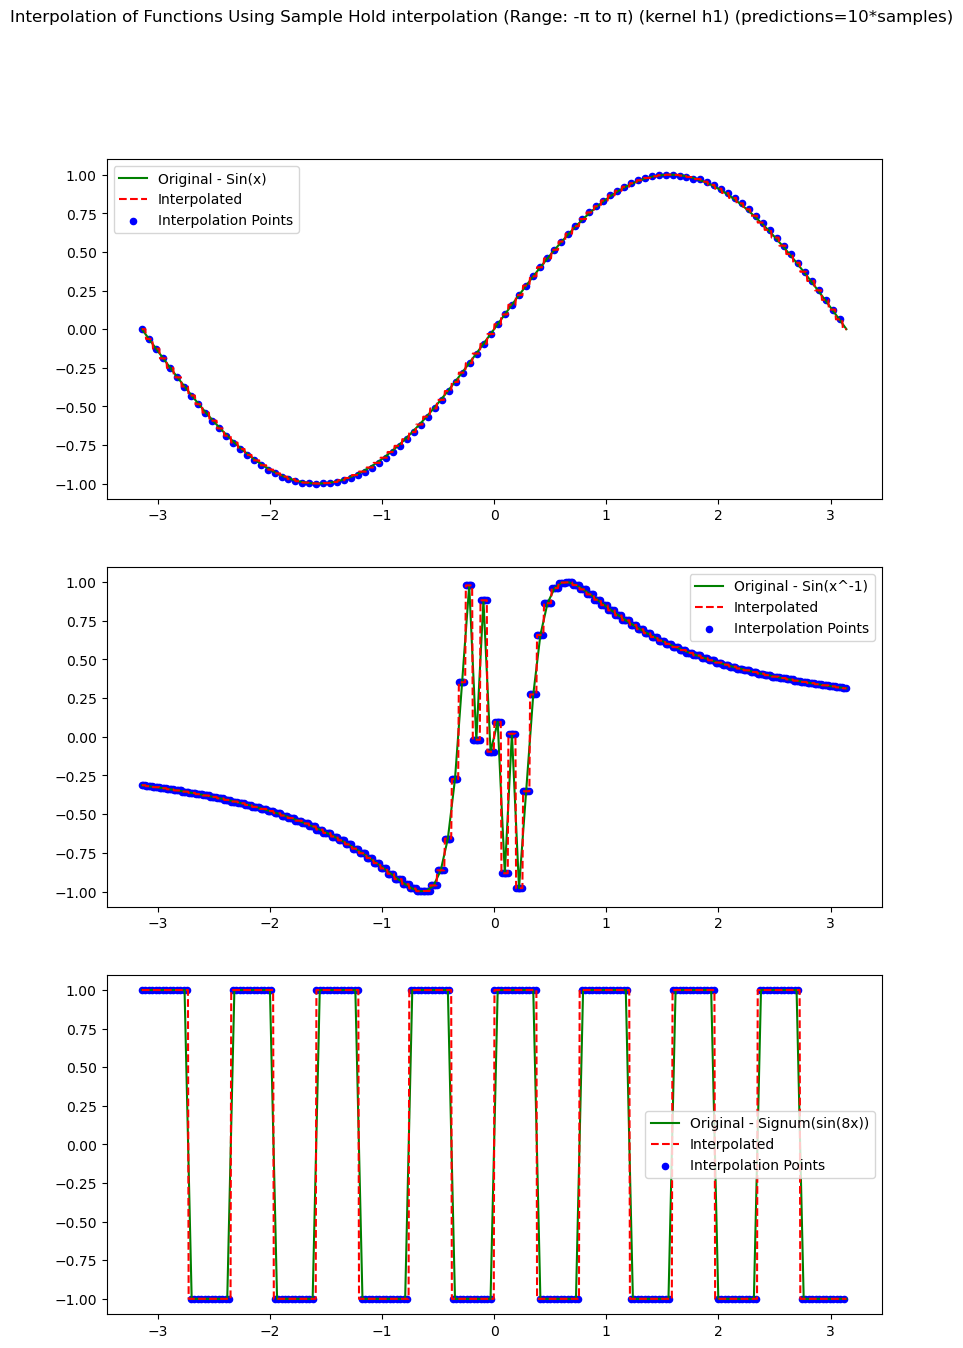

In [50]:
x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n10_interp, nearest_neighbour_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n10_interp, nearest_neighbour_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n10_interp,nearest_neighbour_kernel)

y_simple_sin_true=simple_sin(x_n10_interp)
y_inverted_sin_true=inverterd_sin(x_n10_interp)
y_signum_true=singum(x_n10_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample Hold interpolation (Range: -π to π) (kernel h1) (predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n10_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n10_interp[::10], y_simple_sin_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n10_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n10_interp[::2], y_inverted_sin_interp[::2] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n10_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n10_interp[::5], y_signum_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 10*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 10*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 10*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 4*n predictions: 0.0000
MSE for Fucntion Sin(x^-1) 4*n predictions: 0.0360
MSE for Fucntion Sign(Sin(8x)) 4*n predictions: 0.0989


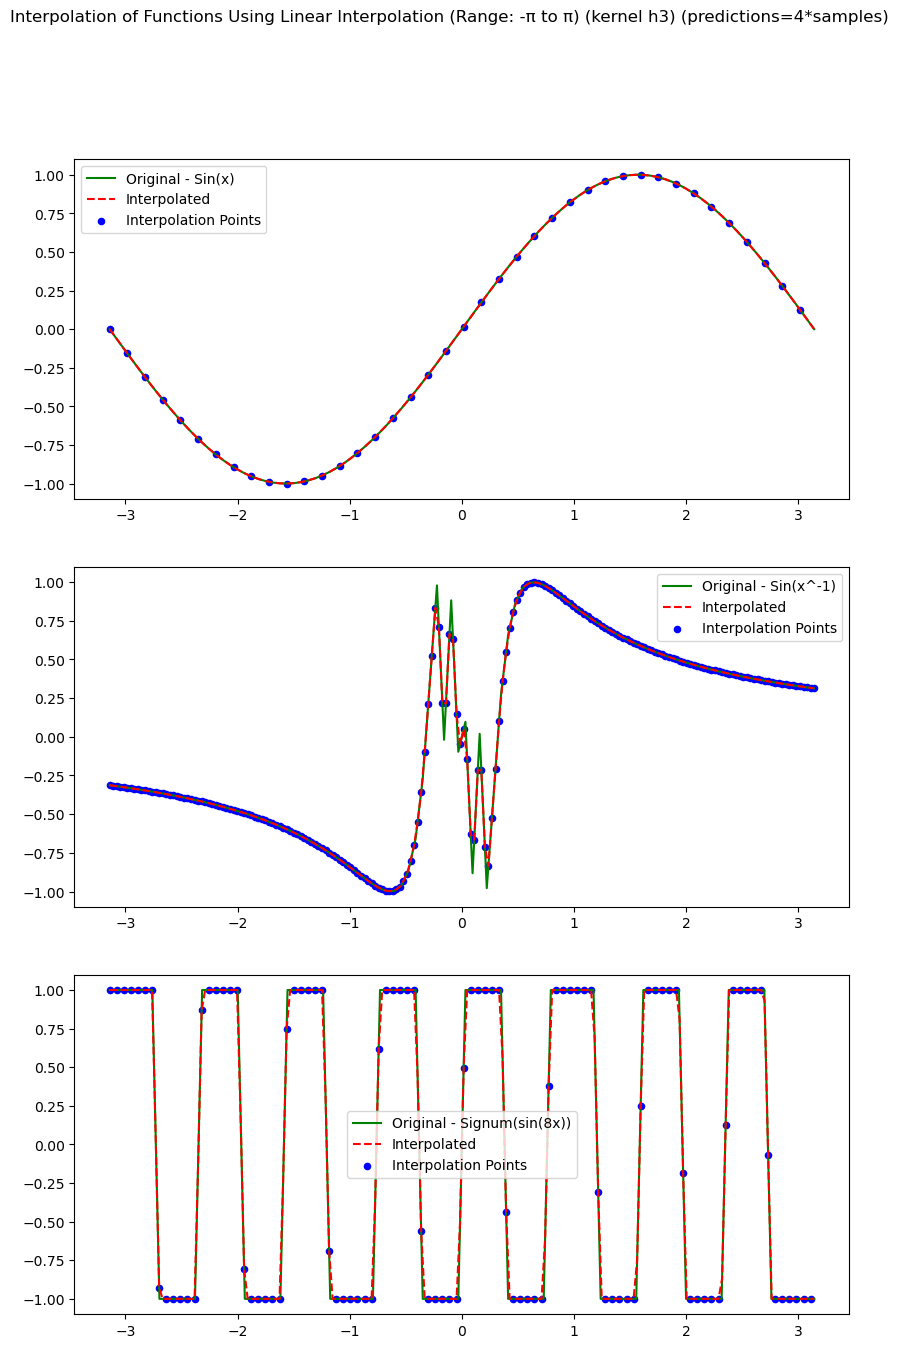

In [51]:
x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n2_interp,linear_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n2_interp,linear_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n2_interp,linear_kernel)

y_simple_sin_true=simple_sin(x_n2_interp)
y_inverted_sin_true=inverterd_sin(x_n2_interp)
y_signum_true=singum(x_n2_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Linear Interpolation (Range: -π to π) (kernel h3) (predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n2_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n2_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n2_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n2_interp[::1], y_inverted_sin_interp[::1] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n2_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n2_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 4*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 4*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 4*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 4*n predictions: 0.0000
MSE for Fucntion Sin(x^-1) 4*n predictions: 0.0440
MSE for Fucntion Sign(Sin(8x)) 4*n predictions: 0.0972


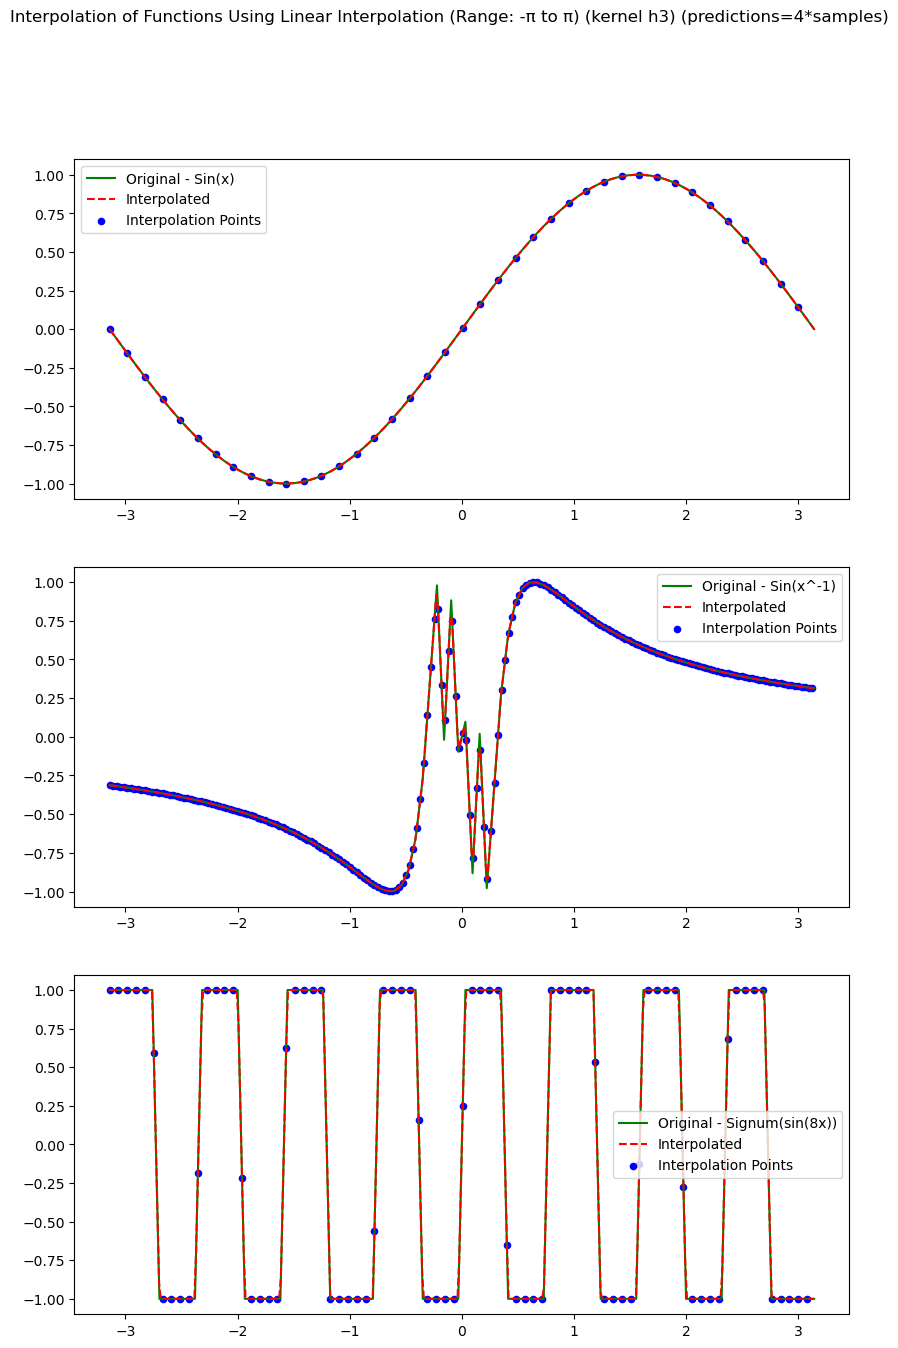

In [52]:
x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n4_interp,linear_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n4_interp, linear_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n4_interp, linear_kernel)

y_simple_sin_true=simple_sin(x_n4_interp)
y_inverted_sin_true=inverterd_sin(x_n4_interp)
y_signum_true=singum(x_n4_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Linear Interpolation (Range: -π to π) (kernel h3) (predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n4_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n4_interp[::10], y_simple_sin_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n4_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n4_interp[::2], y_inverted_sin_interp[::2] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n4_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n4_interp[::5], y_signum_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 4*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 4*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 4*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
0.06346651825433926
0.06346651825433947
MSE for Fucntion Sin(x) 10*n predictions: 0.0000
MSE for Fucntion Sin(x^-1) 10*n predictions: 0.0385
MSE for Fucntion Sign(Sin(8x)) 10*n predictions: 0.0933


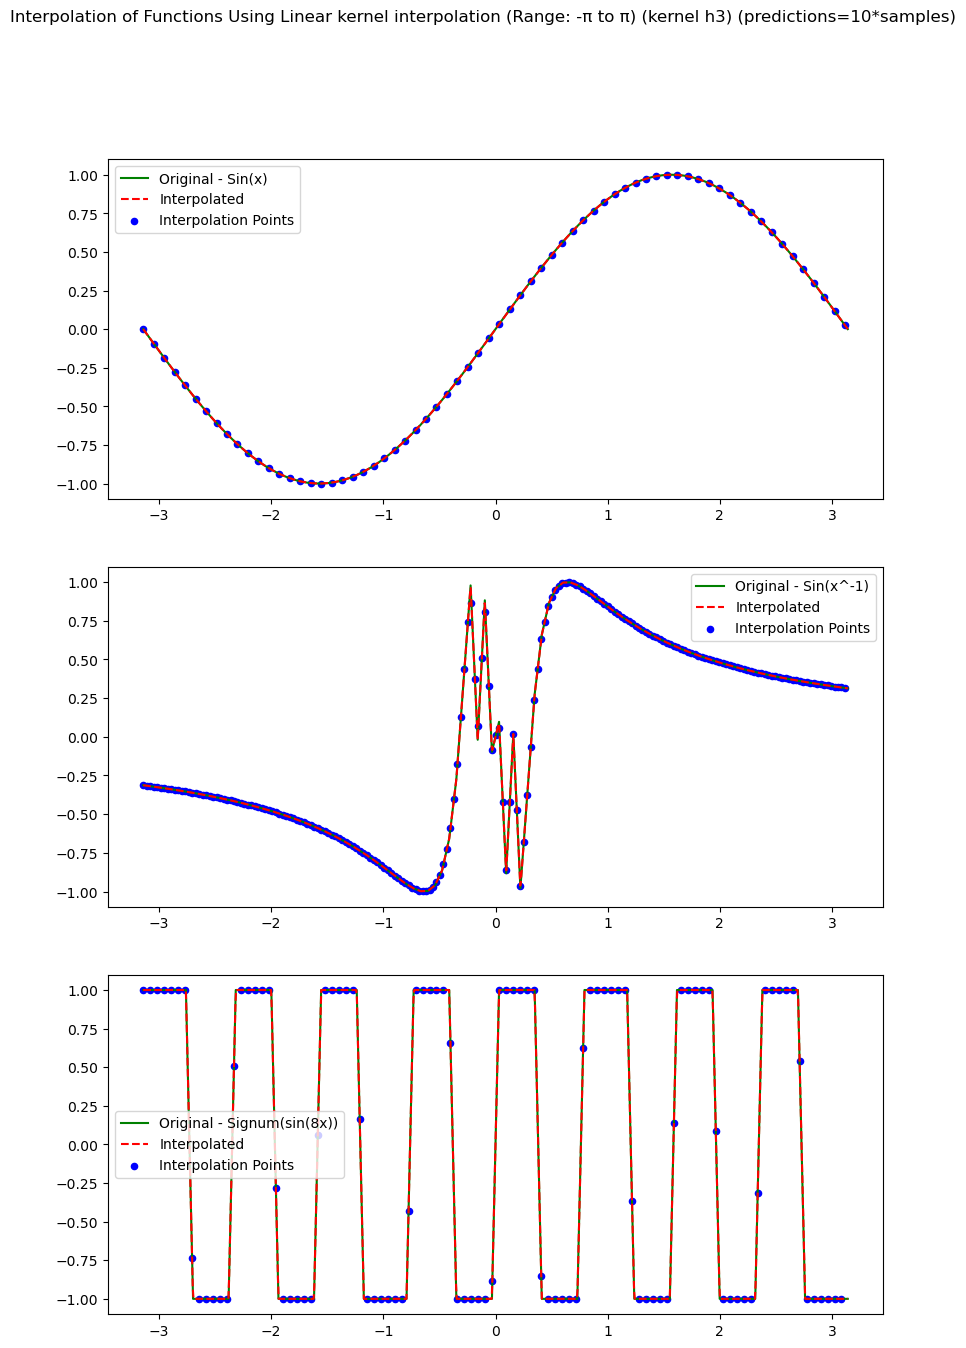

In [53]:
x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n10_interp, linear_kernel)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n10_interp, linear_kernel)
y_signum_interp = conv_interpolate(x, y_signum, x_n10_interp, linear_kernel)

y_simple_sin_true=simple_sin(x_n10_interp)
y_inverted_sin_true=inverterd_sin(x_n10_interp)
y_signum_true=singum(x_n10_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Linear kernel interpolation (Range: -π to π) (kernel h3) (predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n10_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n10_interp[::15], y_simple_sin_interp[::15], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n10_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n10_interp[::5], y_inverted_sin_interp[::5] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n10_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n10_interp[::10], y_signum_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 10*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Fucntion Sin(x^-1) 10*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 10*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

In [54]:
def nearest_neighbor_half_interval(x, y, x_interp):
    new_y = np.zeros_like(x_interp)
    for i, nx in enumerate(x_interp):
        distances = np.abs(x - nx)
        if np.any(distances <= 0.5):  
            closest_idx = np.argmin(distances)
            new_y[i] = y[closest_idx]
        else:
            new_y[i] = 0  
    return new_y


MSE for Fucntion Sin(x) 2*n predictions: 0.0001745327
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0397162172
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.1600000000


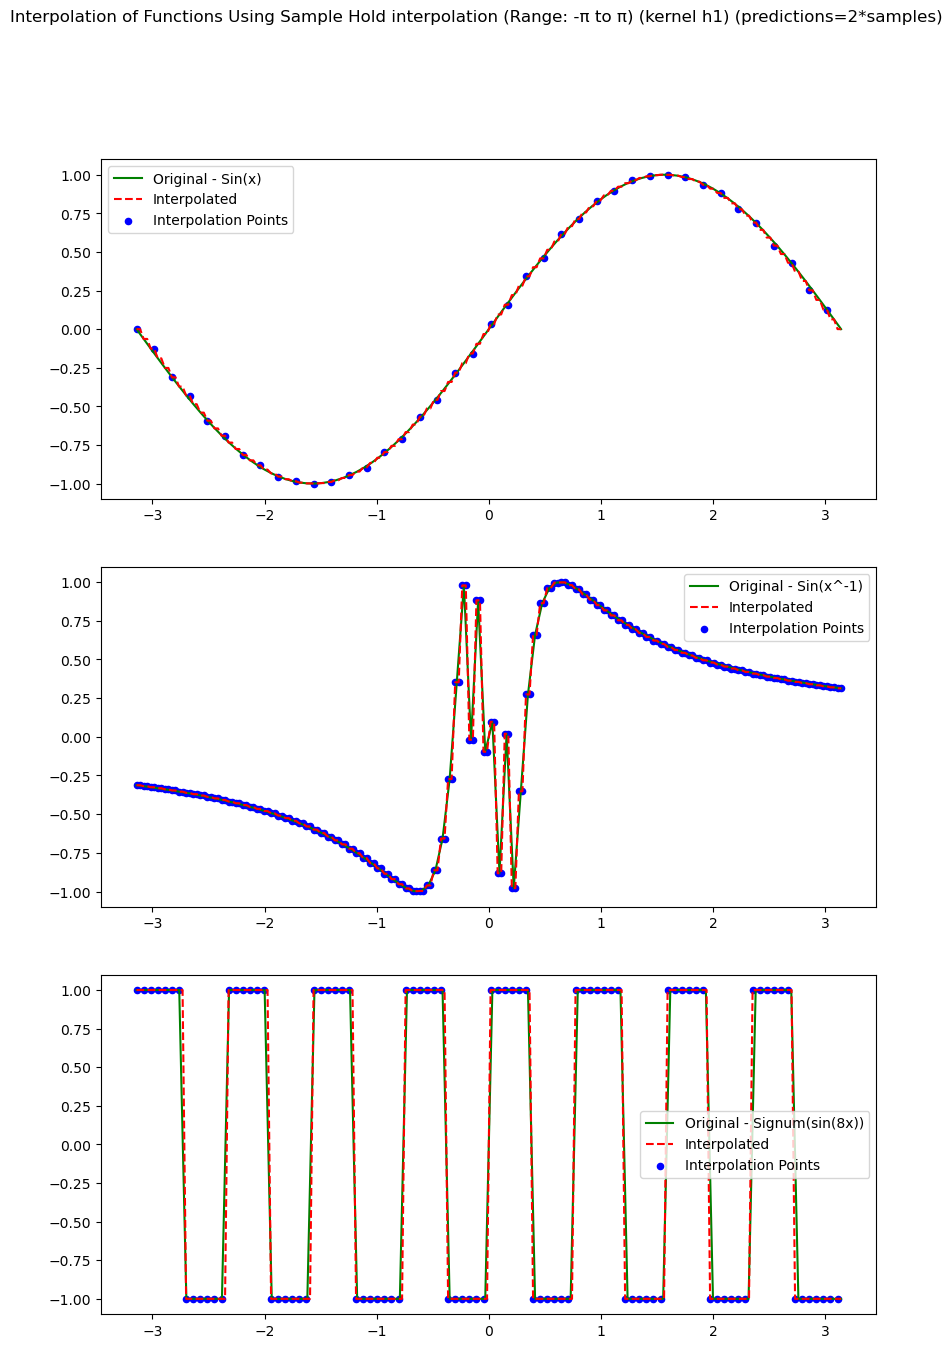

In [55]:

x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = nearest_neighbor_half_interval(x, y_simple_sin, x_n2_interp)
y_inverted_sin_interp = nearest_neighbor_half_interval(x, y_inverted_sin, x_n2_interp)
y_signum_interp = nearest_neighbor_half_interval(x, y_signum, x_n2_interp)

y_simple_sin_true=simple_sin(x_n2_interp)
y_inverted_sin_true=inverterd_sin(x_n2_interp)
y_signum_true=singum(x_n2_interp)

fig, axs=plt.subplots(3,1, figsize=(10,15))

fig.suptitle("Interpolation of Functions Using Sample Hold interpolation (Range: -π to π) (kernel h1) (predictions=2*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n2_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n2_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n2_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n2_interp[::1], y_inverted_sin_interp[::1] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n2_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n2_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.10f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.10f}")


MSE for Fucntion Sin(x) 2*n predictions: 0.0001673958
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0556163647
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.1800000000


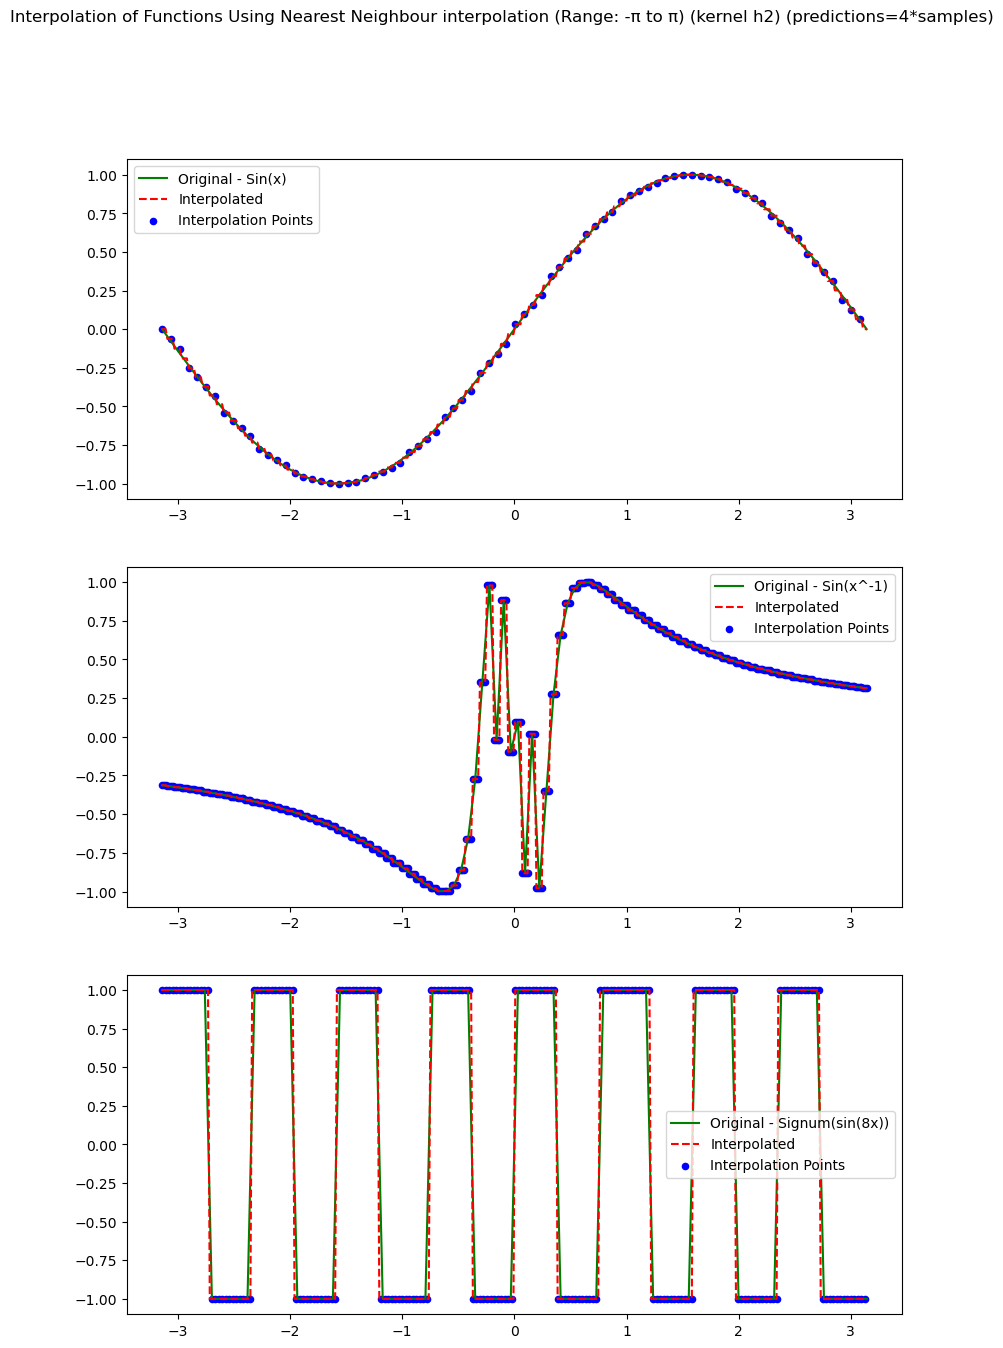

In [56]:
x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

fig, axs=plt.subplots(3,1, figsize=(10,15))

y_simple_sin_interp = nearest_neighbor_half_interval(x, y_simple_sin, x_n4_interp)
y_inverted_sin_interp = nearest_neighbor_half_interval(x, y_inverted_sin, x_n4_interp)
y_signum_interp = nearest_neighbor_half_interval(x, y_signum, x_n4_interp)

y_simple_sin_true=simple_sin(x_n4_interp)
y_inverted_sin_true=inverterd_sin(x_n4_interp)
y_signum_true=singum(x_n4_interp)

fig.suptitle("Interpolation of Functions Using Nearest Neighbour interpolation (Range: -π to π) (kernel h2) (predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n4_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n4_interp[::5], y_simple_sin_interp[::5], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n4_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n4_interp[::1], y_inverted_sin_interp[::1] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n4_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n4_interp[::2], y_signum_interp[::2], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.10f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.10f}")


MSE for Fucntion Sin(x) 2*n predictions: 0.0001676426
MSE for Fucntion Sin(x^-1) 2*n predictions: 0.0485536097
MSE for Fucntion Sign(Sin(8x)) 2*n predictions: 0.1504950495


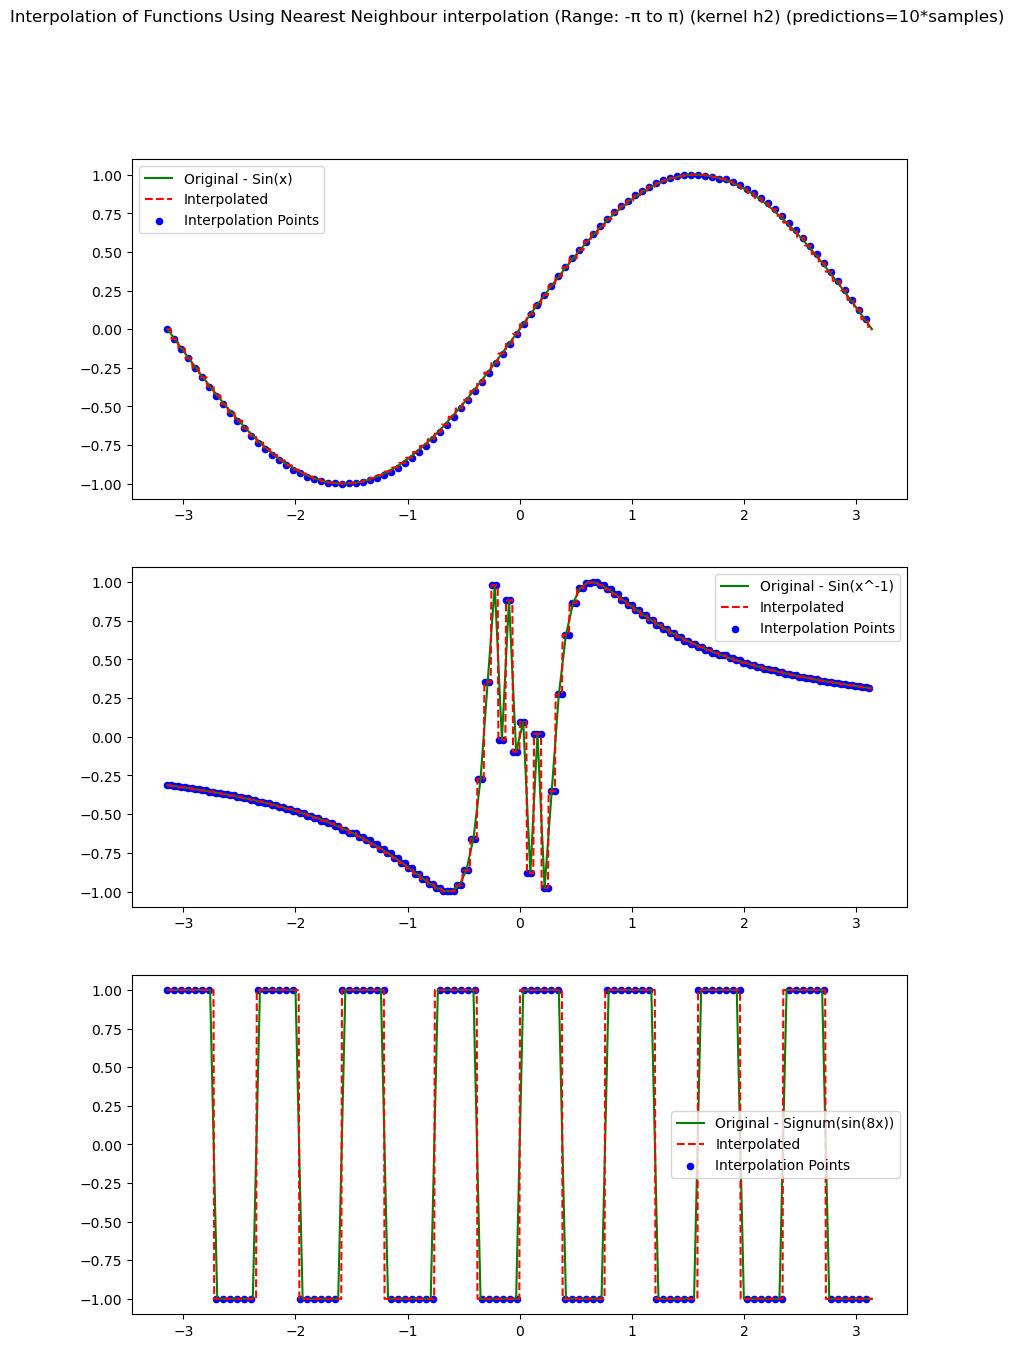

In [57]:
x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

fig, axs=plt.subplots(3,1, figsize=(10,15))

y_simple_sin_interp = nearest_neighbor_half_interval(x, y_simple_sin, x_n10_interp)
y_inverted_sin_interp = nearest_neighbor_half_interval(x, y_inverted_sin, x_n10_interp)
y_signum_interp = nearest_neighbor_half_interval(x, y_signum, x_n10_interp)

y_simple_sin_true=simple_sin(x_n10_interp)
y_inverted_sin_true=inverterd_sin(x_n10_interp)
y_signum_true=singum(x_n10_interp)

fig.suptitle("Interpolation of Functions Using Nearest Neighbour interpolation (Range: -π to π) (kernel h2) (predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label='Original - Sin(x)', color = 'green')
axs[0].plot(x_n10_interp, y_simple_sin_interp, '--', label='Interpolated', color='red')
axs[0].scatter(x_n10_interp[::10], y_simple_sin_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label='Original - Sin(x^-1)',color='green')
axs[1].plot(x_n10_interp, y_inverted_sin_interp, '--', label='Interpolated', color='red')
axs[1].scatter(x_n10_interp[::5], y_inverted_sin_interp[::5] ,color='blue', label='Interpolation Points', s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label='Original - Signum(sin(8x))',color='green')
axs[2].plot(x_n10_interp, y_signum_interp, '--', label='Interpolated', color='red')
axs[2].scatter(x_n10_interp[::10], y_signum_interp[::10], color='blue', label='Interpolation Points', s=20)
axs[2].legend()

print(f"MSE for Fucntion Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.10f}")
print(f"MSE for Fucntion Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.10f}")
print(f"MSE for Fucntion Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.10f}")
